In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from IPython.display import display, Markdown

from math import sqrt

from env import *
from wrangle import *

#import warnings
#warnings.filterwarnings("ignore")

### 1. Load your zillow dataset.

In [12]:
### Wrangle Data
df = wrangle_zillow()

Reading CSV


In [43]:
### Split Data
train, val, test = split_data(df)

### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft. 

In [44]:
train.columns

Index(['Unnamed: 0', 'bedroomcnt', 'bathroomcnt',
       'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt',
       'taxamount', 'fips', 'propertylandusedesc'],
      dtype='object')

In [45]:
# Target Variable
X = 'calculatedfinishedsquarefeet'
y = 'taxvaluedollarcnt'

In [56]:
# New DataFrame To Play With
# Predictions DataFrame
predictions = train[[X,y]]

In [62]:
# Avoiding Pandas Slice Copy Errors
predictions = predictions.assign(baseline_predictions=train[y].mean())

In [20]:
# Baseline Predictions
#predictions['baseline_predictions']=(train[y].mean())

In [64]:
predictions.head(1)

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline_predictions
785772,2317.0,605000.0,460813.571707


In [70]:
'''predictions['yhat'] = ols_model.predict(train[[X]])
'''

"predictions['yhat'] = ols_model.predict(train[[X]])\n"

In [75]:
# Linear Regression Model
# OLS Model
ols_model = LinearRegression()
ols_model.fit(train[[X]],train[[y]])

# Creating new column 'yhat' with Pandas .assign()
predictions = predictions.assign(yhat=ols_model.predict(train[[X]]))

In [78]:
predictions.head(1)

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline_predictions,yhat,baseline_res
785772,2317.0,605000.0,460813.571707,562892.639005,-144186.428293


### 3. Plot the residuals for the linear regression model that you made.

In [76]:
# Baseline Residuals

# Creating new column for Baseline Residuals 'baseline_res' using Pandas .assign()
predictions = predictions.assign(baseline_res=(predictions['baseline_predictions'] - predictions[y]))

#predictions['baseline_res'] = (predictions['baseline_predictions'] - predictions[y])

In [79]:
predictions.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline_predictions,yhat,baseline_res
785772,2317.0,605000.0,460813.571707,562892.639005,-144186.428293
1680852,1100.0,371756.0,460813.571707,288906.668895,89057.571707
1862470,3262.0,836321.0,460813.571707,775642.632229,-375507.428293
148761,1920.0,568808.0,460813.571707,473515.128624,-107994.428293
1770814,992.0,162283.0,460813.571707,264592.383956,298530.571707


# `residual = (yhat - y)`

In [80]:
# Prediction Residuals

# Creating new column for Prediction Residuals 'yhat_res' using Pandas .assign()
predictions = predictions.assign(yhat_res=(predictions['yhat']-predictions[y]))

# Old Method
#predictions['yhat_res'] = predictions['yhat']-predictions[y]

In [82]:
predictions.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline_predictions,yhat,baseline_res,yhat_res
785772,2317.0,605000.0,460813.571707,562892.639005,-144186.428293,-42107.360995
1680852,1100.0,371756.0,460813.571707,288906.668895,89057.571707,-82849.331105
1862470,3262.0,836321.0,460813.571707,775642.632229,-375507.428293,-60678.367771
148761,1920.0,568808.0,460813.571707,473515.128624,-107994.428293,-95292.871376
1770814,992.0,162283.0,460813.571707,264592.383956,298530.571707,102309.383956


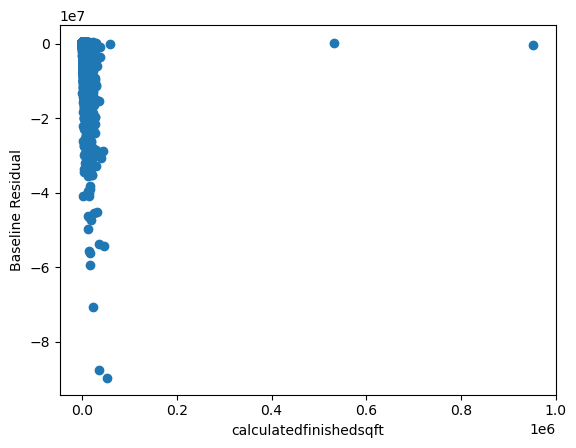

In [83]:
# Plot Baseline Residuals
plt.scatter(predictions[X],predictions['baseline_res'])
plt.xlabel('calculatedfinishedsqft')
plt.ylabel('Baseline Residual')
plt.show()

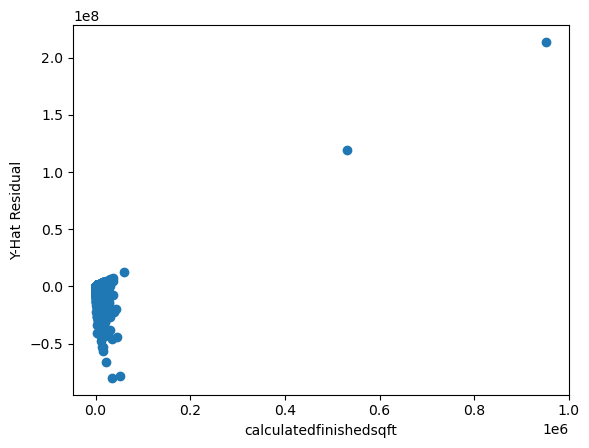

In [84]:
# Plot Y-Hat Residual
plt.scatter(predictions[X],predictions['yhat_res'])
plt.xlabel('calculatedfinishedsqft')
plt.ylabel('Y-Hat Residual')
plt.show()

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [87]:
# SSE

# Pre-work
predictions['baseline_res_squared'] = predictions['baseline_res']**2
predictions['yhat_res_squared']= predictions['yhat_res']**2
# Calculations
sse_yhat = predictions['yhat_res_squared'].sum()
print(f"SSE = {sse_yhat}")


# MSE
mse_yhat = sse_yhat/len(predictions)
print(f"MSE = {mse_yhat}")

# RMSE
rmse_yhat = sqrt(mse_yhat)
print(f"RMSE = {rmse_yhat}")

SSE = 5.1868237963800486e+17
MSE = 378669377359.3757
RMSE = 615361.1763504224


###  5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [88]:
# SSE Baseline
sse_baseline = predictions['baseline_res_squared'].sum()

# MSE Baseline
mse_baseline = sse_baseline/len(predictions)

# RMSE Baseline
rmse_baseline = sqrt(mse_baseline)
print(f"SSE Baseline = {sse_baseline}")
print(f"MSE Baseline = {mse_baseline}")
print(f"RMSE Baseline = {rmse_baseline}")

SSE Baseline = 6.443462189474961e+17
MSE Baseline = 470411548784.44684
RMSE Baseline = 685865.5471624499


### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [89]:
(sse_yhat < sse_baseline)

True

### 7. What is the amount of variance explained in your model.

In [91]:
ess_baseline = 0

# ESS
predictions['yhat_mean_res'] = predictions['yhat'] - predictions['baseline_predictions']
predictions['yhat_mean_res_squared'] = predictions['yhat_mean_res']**2


ess_yhat = predictions['yhat_mean_res_squared'].sum()
tss_yhat = sse_yhat + ess_yhat

ess_yhat / tss_yhat

# Output
print(f"ESS = {sum((predictions['yhat'] - predictions[y].mean())**2)}")
display(Markdown(rf"""

ESS $R^2$ = `{ess_yhat/tss_yhat}`

"""))

# TSS
tss_baseline = sse_baseline+ess_baseline
tss_yhat = sse_yhat+ess_yhat

ESS = 1.2566383930961896e+17




ESS $R^2$ = `0.19502533826431886`



### 8. Is your model better than the baseline model?

In [103]:
# yhat variance
evs_yhat=explained_variance_score(predictions[y],predictions['yhat'])
print("-= SciKit Learn Function() =- ")
print(f"explained_variance_score(yhat): {evs_yhat}")

-= SciKit Learn Function() =- 
explained_variance_score(yhat): 0.1950253382641962


In [104]:
# baseline variance
evs_baseline=explained_variance_score(predictions[y],predictions['baseline_predictions'])
print("-= SciKit Learn Function() =- ")
print(f"explained_variance_score(Baseline): {evs_baseline}")

-= SciKit Learn Function() =- 
explained_variance_score(Baseline): 0.0


In [106]:
evs_yhat > evs_baseline

True

In [ ]:
# Yes

### 9. Create a file named evaluate.py that contains the following functions.

```python
    plot_residuals(y, yhat): creates a residual plot
    regression_errors(y, yhat): returns the following values:
        sum of squared errors (SSE)
        explained sum of squares (ESS)
        total sum of squares (TSS)
        mean squared error (MSE)
        root mean squared error (RMSE)
    baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
    better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
```

## `evaluate.py`

In [94]:
def plot_residuals(y, yhat):
    # Calculate Residuals
    residuals = y - yhat

    # P L O T T I N G
    plt.hlines(0, y.min(), y.max(), ls='--')
    plt.scatter(y, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('y value ($y$)')
    plt.title('y vs yhat')
    plt.show()

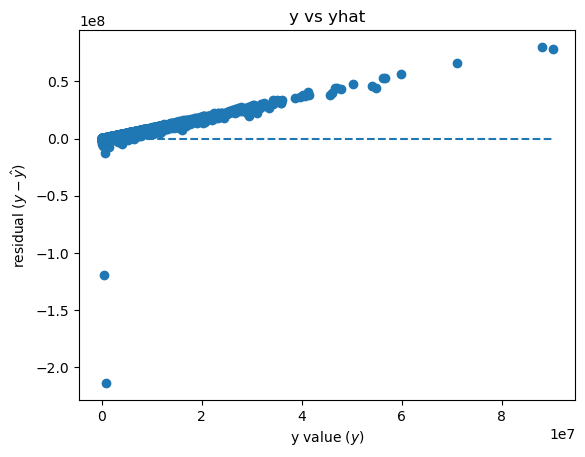

In [95]:
plot_residuals(predictions[y], predictions['yhat'])

In [ ]:
explained_variance_score

In [96]:
def regression_errors(y, yhat):
    MSE = mean_squared_error(y, yhat)
    SSE = MSE * len(y)
    RMSE = MSE**.5
    
    ESS = ((yhat - y.mean())**2).sum()
    TSS = ESS + SSE
    
    return SSE, ESS, TSS, MSE, RMSE

In [97]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(predictions[y], predictions['yhat'])

In [99]:
def baseline_mean_errors(y):
    baseline = np.repeat(y.mean(), len(y))
    
    MSE = mean_squared_error(y, baseline)
    SSE = MSE * len(y)
    RMSE = MSE**.5
    
    return SSE, MSE, RMSE

In [100]:
SSE, MSE, RMSE = baseline_mean_errors(predictions[y])

In [101]:
def better_than_baseline(y, yhat):
    SSE, ESS, TSS, MSE, RMSE = regression_errors(y, yhat)
    
    SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y)
    
    if SSE < SSE_baseline:
        print('better than baseline')
    else:
        print('not better than baseline')

In [102]:
better_than_baseline(predictions[y], predictions['yhat'])

better than baseline
